In [1]:
# day 15
import re
import numpy as np

f = open("data/data15.txt", "r")
lines = f.readlines()
lines = [l[:-1] for l in lines]

d = {}
distances = {}
L_sensors = []
L_beacons = []
for line in lines:
    x, y, a, b = tuple([int(z) for z in re.findall(r'-?\d+', line)])
    L_sensors.append((x, y)) 
    L_beacons.append((a, b))
    d[(x, y)] = (a, b)
    distances[(x, y)] = np.abs(x-a) + np.abs(y-b)

xmin = min([s[0] for s in L_sensors] + [b[0] for b in L_beacons] + [s[0]-distances[s] for s in L_sensors])
xmax = max([s[0] for s in L_sensors] + [b[0] for b in L_beacons] + [s[0]+distances[s] for s in L_sensors])
ymin = min([s[1] for s in L_sensors] + [b[1] for b in L_beacons] + [s[1]-distances[s] for s in L_sensors])
ymax = max([s[1] for s in L_sensors] + [b[1] for b in L_beacons] + [s[1]+distances[s] for s in L_sensors])
print("All variables created, A will have size", xmax-xmin, ymax-ymin)

All variables created, A will have size 6211905 6982765


In [2]:
y0 = 2000000
k = 0
x_vect = np.arange(xmin, xmax+1)
z = 0 * x_vect
for s in L_sensors:
    newdist = np.abs(s[0]-x_vect) + np.abs(s[1]-y0)
    z += newdist<=distances[s]

for b in L_beacons:
    i = b[0]-xmin
    if b[1]==y0:
        z[i] = 0
    
print((z>0).sum())

4737567


In [3]:
#N = 20
N = 4000000

corners = {}
newcorners = {}
rects = {}
for s in L_sensors:
    d = distances[s]+1
    corners[s] = [(s[0], s[1]-d), (s[0]+d, s[1]), (s[0], s[1]+d), (s[0]-d, s[1])]
    newcorners[s] = [((x[0]+x[1])/2, (x[0]-x[1])/2) for x in corners[s]]
    rects[s] = (newcorners[s][3][0], newcorners[s][1][0], newcorners[s][3][1], newcorners[s][1][1])

def get_intersect(rect1, rect2):
    xmin1, xmax1, ymin1, ymax1 = rect1
    xmin2, xmax2, ymin2, ymax2 = rect2
    x1 = max(xmin1, xmin2)
    x2 = min(xmax1, xmax2)
    y1 = max(ymin1, ymin2)
    y2 = min(ymax1, ymax2)
    return [(x1, y1), (x1, y2), (x2, y1), (x2, y2)]

for i, s1 in enumerate(L_sensors):
    for j, s2 in enumerate(L_sensors[i+1:]):
        L = get_intersect(rects[s1], rects[s2])
        #print(i, i+1+j)
        for e in L:
            x = e[0] + e[1]
            y = e[0] - e[1]
            if x>=0 and x<=N and y>=0 and y<=N:
                cond = True
                for k, ss in enumerate(L_sensors):
                    dd = distances[ss]
                    if (np.abs(x-ss[0])+np.abs(y-ss[1]))<=dd:
                        #f cond:
                            #print("false because of", k)
                        cond = False
                if cond:
                    print(x, y) 


3316868.0 2686239.0
3316868.0 2686239.0
3316868.0 2686239.0
3316868.0 2686239.0


In [4]:
3316868*4000000+2686239

13267474686239

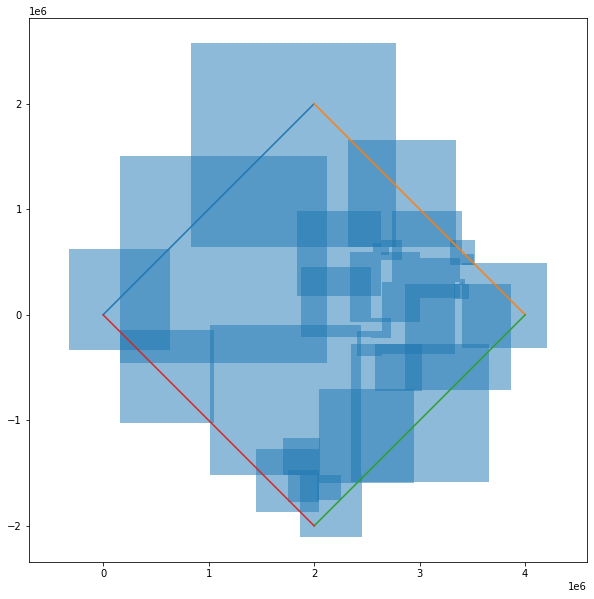

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

list_rects = []

fig, ax = plt.subplots(figsize=(10, 10))

for s in L_sensors:
    d = distances[s]
    corner_min = (s[0]-d, s[1])
    corner_max = (s[0]+d, s[1])
    umin = (corner_min[0] + corner_min[1]) / 2
    umax = (corner_max[0] + corner_max[1]) / 2
    vmin = (corner_min[0] - corner_min[1]) / 2
    vmax = (corner_max[0] - corner_max[1]) / 2
    ax.add_patch(Rectangle((umin, vmin), umax-umin, vmax-vmin, alpha=0.5))


plt.plot([0, N/2], [0, N/2])
plt.plot([N, N/2], [0, N/2])
plt.plot([N, N/2], [0, -N/2])
plt.plot([0, N/2], [0, -N/2])
#plt.xlim(0, N)
#plt.ylim(-N/2, N/2)
plt.xlim(3001550, 3001556)
plt.ylim(315310, 315320)
plt.axis('equal')
#plt.grid(True)
plt.show()